### Visual Earnings Based on College Majors
The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/).  They conduct surveys and aggregate the data.  The dataset we are using is the job outcomes of students who graduated from college between 2010 and 2012. The dataset was cleaned and releasd on the [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors) for FiveThirtyEight.<br>
The rows in the dataset correspond to a different college major and contain information such as gender diversity. employment rates, and median salaries.  Some of the columns are:
* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load data and explore dataset
recent_grads=pd.read_csv('recent-grads.csv')
recent_grads.iloc[1]

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grads.shape

(173, 21)

In [7]:
#drop missing values
recent_grads=recent_grads.dropna()
recent_grads.shape

(172, 21)

#### Data exploratory visualizations

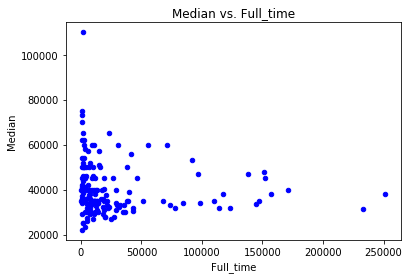

In [9]:
ax=recent_grads.plot(kind='scatter', x='Full_time', y='Median',color='blue')
ax.set_title('Median vs. Full_time')
plt.show()

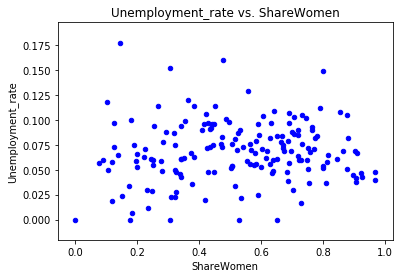

In [10]:
ax=recent_grads.plot(kind='scatter', x='ShareWomen', y='Unemployment_rate',color='blue')
ax.set_title('Unemployment_rate vs. ShareWomen')
plt.show()

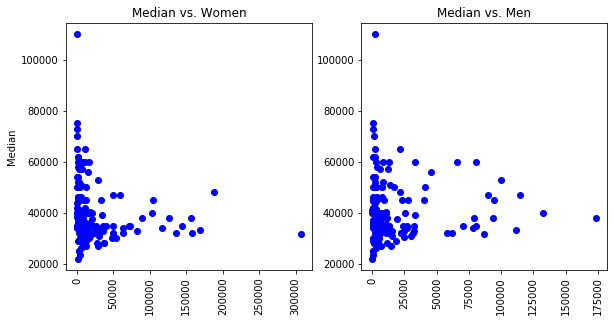

In [11]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,3,1)
ax1.scatter(recent_grads['Women'],recent_grads['Median'],color='blue')
ax1.set_title('Median vs. Women')
ax1.set_ylabel('Median')
ax1.tick_params(axis='x', labelrotation=90)

ax2=fig.add_subplot(2,3,2)
ax2.scatter(recent_grads['Men'],recent_grads['Median'],color='blue')
ax2.set_title('Median vs. Men')
ax2.tick_params(axis='x', labelrotation=90)

plt.show()

#### Histograms

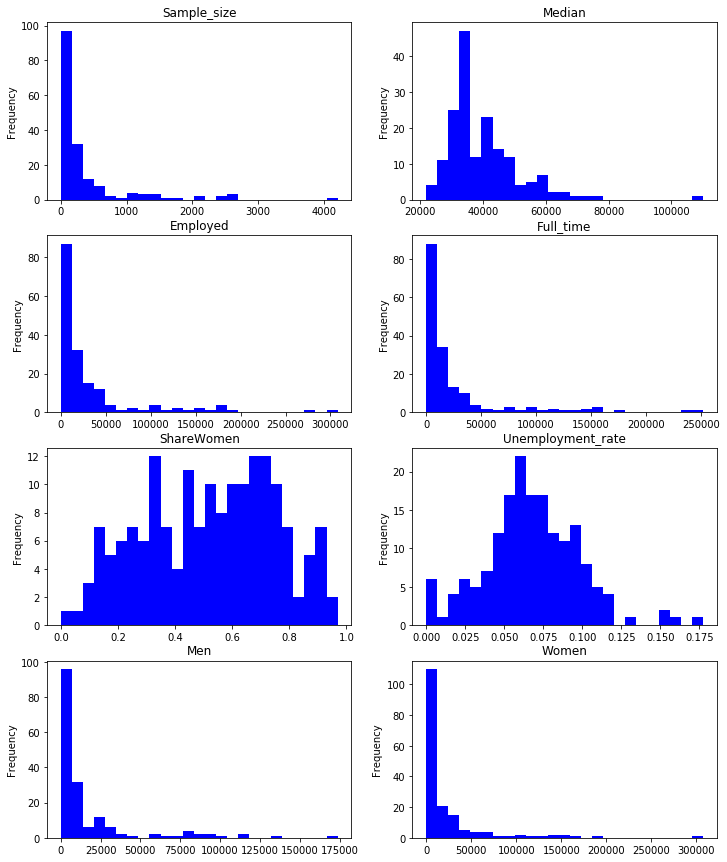

In [13]:
#Histograms of some of the columns
columns=['Sample_size','Median','Employed','Full_time','ShareWomen',
        'Unemployment_rate','Men','Women']
fig = plt.figure(figsize=(12,15))
for i in range(len(columns)):
    ax = fig.add_subplot(4,2,i+1)
    ax = recent_grads[columns[i]].plot(kind='hist', bins=25,color='blue')
    ax.set_title('{}'.format(columns[i]))

The histograms shows distributions for just one column, we need to look at more than one column to better understand the data.  From the histograms you can see the median salary is around 35K-40K, the majority of majors are full time, and majority are employed.<br>
We will now look at data using a scatter matrix.<br>
#### Scatter Matrix

In [14]:
from pandas.plotting import scatter_matrix

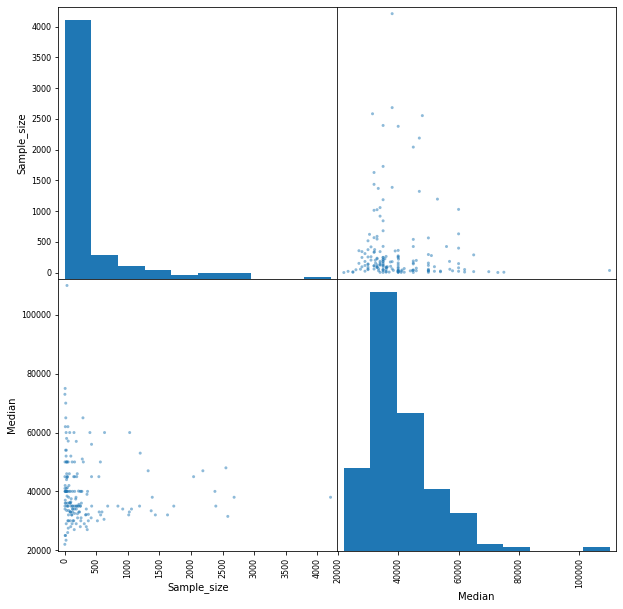

In [20]:
#Sample_size and Median
ax = scatter_matrix(recent_grads[['Sample_size','Median']], 
                    figsize=(10,10))

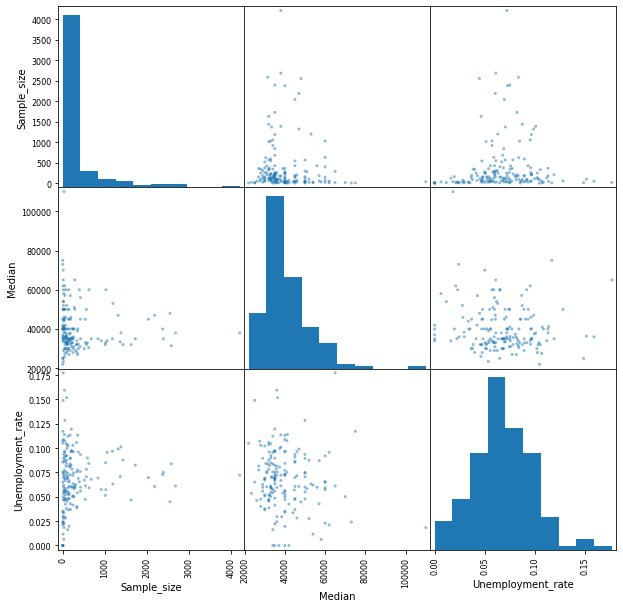

In [21]:
#Sample_size, Median, and Unemployment_rate
ax = scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], 
                    figsize=(10,10))

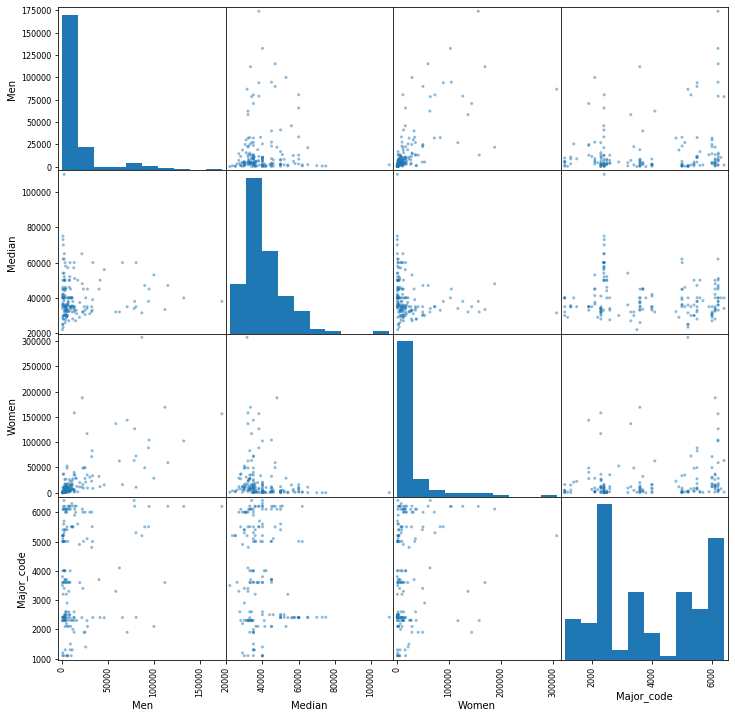

In [22]:
ax = scatter_matrix(recent_grads[['Men','Median','Women','Major_code']], 
                    figsize=(12,12))

In [23]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [24]:
#Top 10 by rank(median income) and top 10 by Total(number of student in major)
top_ten_rank=recent_grads.head(10)
top_ten_total=recent_grads.sort_values(by=['Total'],ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Majors: Total Students')

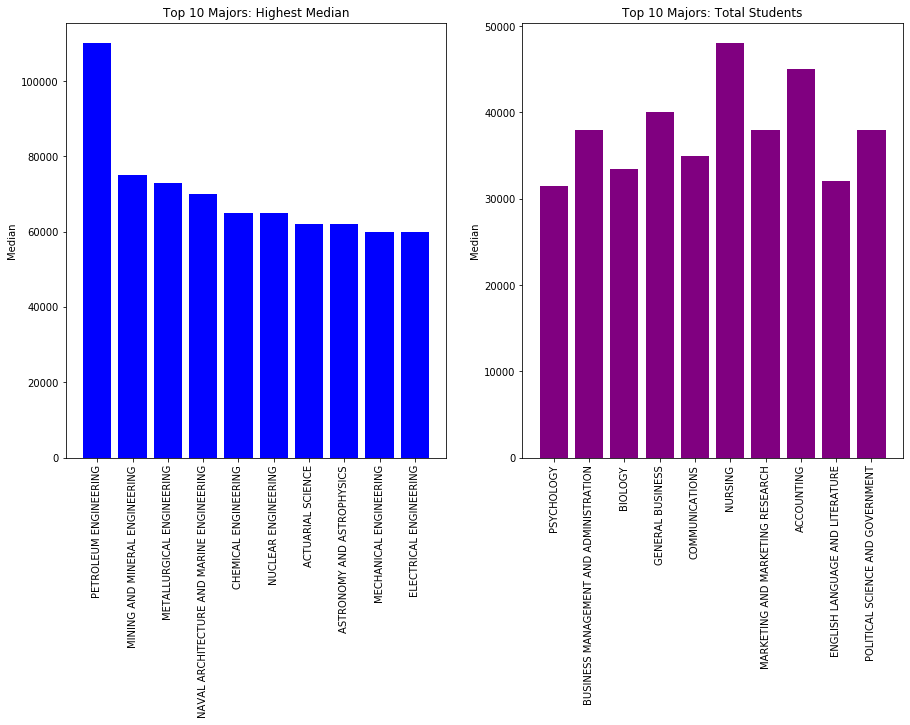

In [25]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(top_ten_rank['Major'],top_ten_rank['Median'],color='blue')
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_ylabel('Median')
ax1.set_title('Top 10 Majors: Highest Median')
ax2.bar(top_ten_total['Major'],top_ten_total['Median'],color='purple')
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_ylabel('Median')
ax2.set_title('Top 10 Majors: Total Students')

The graphs above are the top 10 majors with the highest median salaries (blue) compared to the top 10 majors with the most students.  This shows that the most 'popular' majors, defined by number of students are not the highest paying majors when it come to the job market.

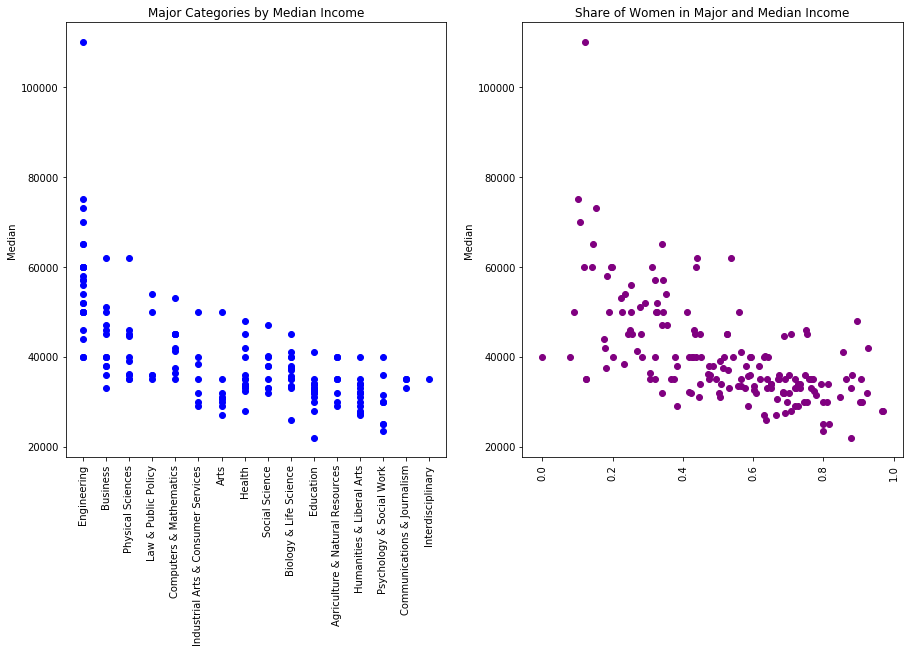

In [26]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(recent_grads['Major_category'],recent_grads['Median'],color='blue')
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_ylabel('Median')
ax1.set_title('Major Categories by Median Income')
ax2.scatter(recent_grads['ShareWomen'],recent_grads['Median'],color='purple')
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_ylabel('Median')
ax2.set_title('Share of Women in Major and Median Income')
plt.show()

The Engineering major category has the highest median income, followed closely by business and physical sciences.  Majors with a high share of women have lower median incomes. Let us look at the breakdown of men and women a little closer for these categories. 

In [27]:
cols=['Engineering', 'Business','Physical Sciences']
top_cat = recent_grads[(recent_grads['Major_category']=='Engineering') | 
                       (recent_grads['Major_category']=='Business') |
                      (recent_grads['Major_category']=='Physical Sciences')]

In [28]:
df=top_cat.groupby(['Major_category']).mean()[['Total','Men','Women','ShareWomen','Unemployment_rate','Median']]
df

,Total,Men,Women,ShareWomen,Unemployment_rate,Median
Major_category,,,,,,
Business,100182.769231,51373.230769,48809.538462,0.483198,0.071064,43538.461538
Engineering,18537.344828,14079.551724,4457.793103,0.238889,0.063334,57382.758621
Physical Sciences,18547.900000,9539.000000,9008.900000,0.508683,0.046511,41890.000000


Business has the higher number of students and almost half are women.  The median salary is above average.  Physical sciences has over 50% women and a median above average.  The category with the highest median of 57383 is Engineering where the share of women is just under a quarter.  We will look at engineering more closely since there are many majors within that category to see if the women share and median salaries are consistent throughout.

In [29]:
engineering=top_cat[top_cat['Major_category']=='Engineering']
engineering.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


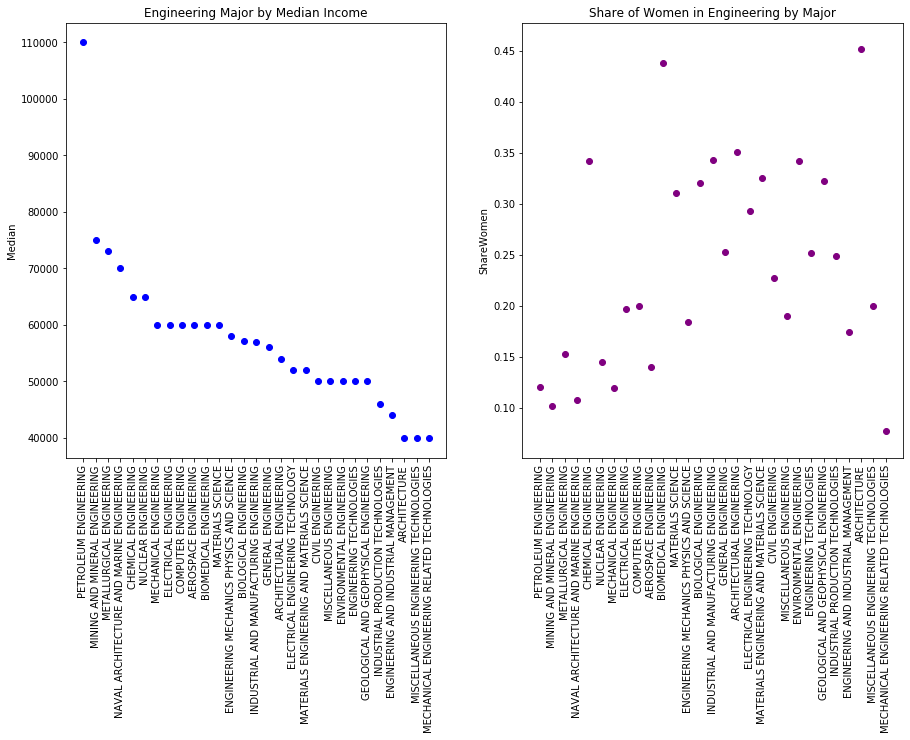

In [30]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(engineering['Major'],engineering['Median'],color='blue')
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_ylabel('Median')
ax1.set_title('Engineering Major by Median Income')
ax2.scatter(engineering['Major'],engineering['ShareWomen'],color='purple')
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_ylabel('ShareWomen')
ax2.set_title('Share of Women in Engineering by Major')
plt.show()

The top three majors, Petroleum Engineering, Mining and Mineral Engineering, and Metallurgical Engineering have the lower shares of women between 10-15%

#### Majors and ShareWomen
Which Majors have the most women and which majors have the most men.  How does Median and Unemployment compare?
We will define > 80% at majority women and less than 20% as majority men.

In [31]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [32]:
maj_women=recent_grads[recent_grads['ShareWomen']>.8]
maj_men=recent_grads[recent_grads['ShareWomen']<.2]
t=recent_grads.shape[0]
w=maj_women.shape[0]
m=maj_men.shape[0]
print('There are {} majors with more than 80% women'.format(w))
print('Out of {t} majors, {pw:.2f}% are majority women'.format(t=t,pw=100*(w/t)))
print('There are {} majors with more than 80% men'.format(m))
print('Out of {t} majors, {pm:.2f}% are majority men'.format(t=t,pm=100*(m/t)))

There are 18 majors with more than 80% women
Out of 172 majors, 10.47% are majority women
There are 19 majors with more than 80% men
Out of 172 majors, 11.05% are majority men


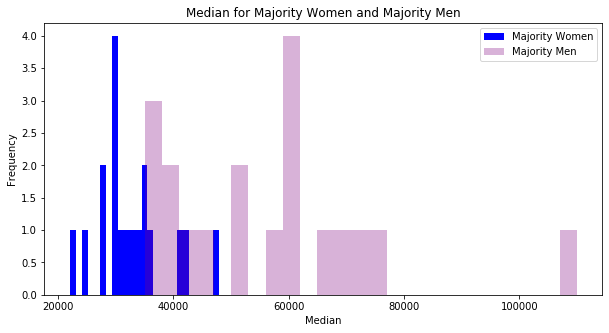

In [33]:
fig=plt.figure(figsize=(10,5))
ax = maj_women['Median'].plot(kind='hist', bins=25, label='Majority Women', legend=True, color='blue')
ax = maj_men['Median'].plot(kind='hist', bins=25, alpha=0.3, label='Majority Men', legend=True, color='purple')
ax.set_title('Median for Majority Women and Majority Men')
ax.set_xlabel('Median')
plt.show()

The above histogram shows the distribution of median salaries for majors with majority women (blue) and majority men (light purple).  The median salary is mostly below the average for the women dominant majors and above average for the male dominant majors.

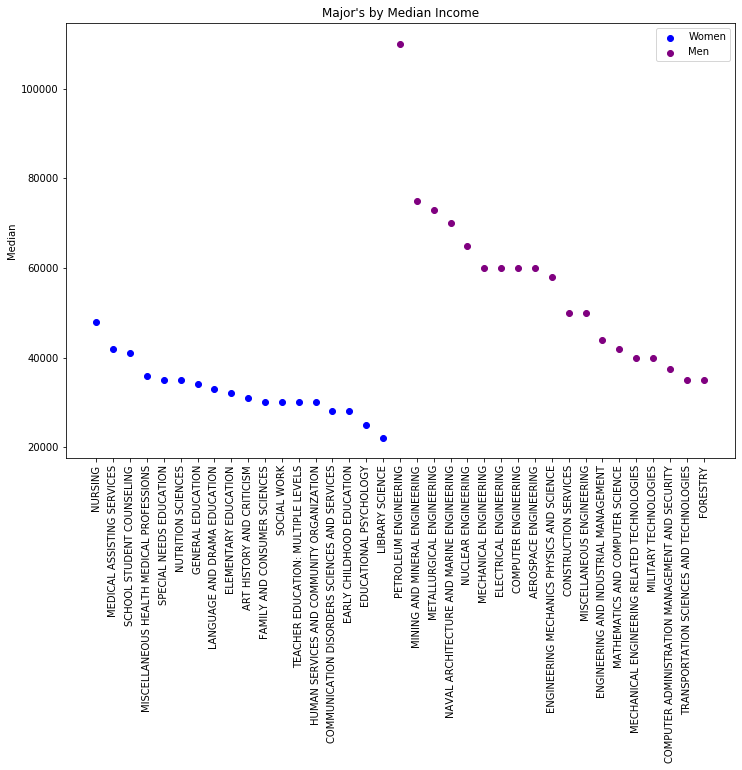

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(maj_women['Major'],maj_women['Median'],color='blue',label='Women')
ax1.scatter(maj_men['Major'],maj_men['Median'],color='purple',label='Men')
ax1.set_ylabel('Median')
ax1.set_title("Major's by Median Income")
ax1.tick_params(axis='x', labelrotation=90)
ax1.legend()
plt.show()

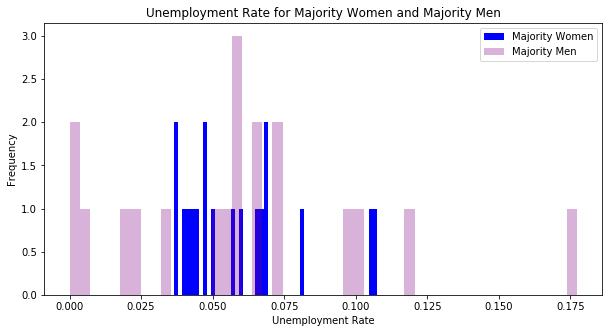

In [35]:
fig=plt.figure(figsize=(10,5))
ax = maj_women['Unemployment_rate'].plot(kind='hist', bins=50, label='Majority Women', legend=True, color='blue')
ax = maj_men['Unemployment_rate'].plot(kind='hist', bins=50, alpha=0.3, label='Majority Men', legend=True, color='purple')
ax.set_title('Unemployment Rate for Majority Women and Majority Men')
ax.set_xlabel('Unemployment Rate')
plt.show()

The unemployment for women majority majors is spread over a much larger range than men and has some of the higher unemployment rates.

In [36]:
#Majority women grouped by major category
print("Majors with > 80% Women")
maj_women.groupby(['Major_category']).mean()[['Rank','Total','Median','Unemployment_rate','College_jobs',
                                             'Non_college_jobs','Low_wage_jobs']]

Majors with > 80% Women


,Rank,Total,Median,Unemployment_rate,College_jobs,Non_college_jobs,Low_wage_jobs
Major_category,,,,,,,
Education,129.000000,53467.250000,31875.000000,0.060617,32917.5,11114.75,3840.625000
Health,88.800000,58218.200000,37800.000000,0.057013,37175.6,10361.20,3291.800000
Humanities & Liberal Arts,149.000000,21030.000000,31000.000000,0.060298,5139.0,9738.00,3426.000000
Industrial Arts & Consumer Services,151.000000,58001.000000,30000.000000,0.067128,20985.0,20133.00,5248.000000
Psychology & Social Work,159.666667,21926.666667,28333.333333,0.057253,10605.0,6542.00,1716.666667


In [37]:
#Majority men grouped by major category
print("Majors with > 80% Men")
maj_men.groupby(['Major_category']).mean()[['Rank','Total','Median','Unemployment_rate','College_jobs',
                                             'Non_college_jobs','Low_wage_jobs']]

Majors with > 80% Men


,Rank,Total,Median,Unemployment_rate,College_jobs,Non_college_jobs,Low_wage_jobs
Major_category,,,,,,,
Agriculture & Natural Resources,112.000000,3607.000000,35000.000000,0.096726,1096.000000,1692.000000,327.000000
Computers & Mathematics,67.500000,4337.500000,39750.000000,0.049862,1403.000000,1655.500000,166.500000
Engineering,16.923077,19868.153846,63461.538462,0.061915,10983.769231,3330.615385,733.923077
Industrial Arts & Consumer Services,69.333333,11257.333333,41666.666667,0.044249,2616.666667,3832.666667,420.000000


We grouped the majority women and men majors above by `Major_category` to look at the following columns about type of jobs.
* `College_jobs`	Number with job requiring a college degree
* `Non_college_jobs`	Number with job not requiring a college degree
* `Low_wage_jobs`	Number in low-wage service jobs

In [38]:
#Women Majority
w_college=maj_women['College_jobs'].sum()
w_non_college=maj_women['Non_college_jobs'].sum()
w_low_wage=maj_women['Low_wage_jobs'].sum()
w_total = w_college + w_non_college + w_low_wage
#Men Majority
m_college=maj_men['College_jobs'].sum()
m_non_college=maj_men['Non_college_jobs'].sum()
m_low_wage=maj_men['Low_wage_jobs'].sum()
m_total = m_college + m_non_college + m_low_wage

print('Majors with over 80% women totals {} men and women students:'.format(w_total))
print('There are {:.2f}% with college jobs'.format(100*(w_college/w_total)))
print('There are {:.2f}% with non college jobs'.format(100*(w_non_college/w_total)))
print('There are {:.2f}% with low wage jobs'.format(100*(w_low_wage/w_total)))
print('\n')
print('Majors with less then 20% women totals {} men and women students:'.format(m_total))
print('There are {:.2f}% with college jobs'.format(100*(m_college/m_total)))
print('There are {:.2f}% with non college jobs'.format(100*(m_non_college/m_total)))
print('There are {:.2f}% with low wage jobs'.format(100*(m_low_wage/m_total)))


Majors with over 80% women totals 758386 men and women students:
There are 66.87% with college jobs
There are 25.08% with non college jobs
There are 8.04% with low wage jobs


Majors with less then 20% women totals 225801 men and women students:
There are 68.44% with college jobs
There are 26.48% with non college jobs
There are 5.08% with low wage jobs


The distribution of job type is very close for majors where women dominate and where men dominate.

### Conclusion
The most popular majors do not have the highest median salary.
The major category of `Engineering` has the highest median income (57383), followed closely by `Business` (43538) and `Physical Sciences` (41890). 
The `Business` category has the highest number of students with nearly half being women students. The median salary for `Business` is above average at 43538. `Physical Sciences` has over 50% women and a median above average. The category with the highest median of 57383 is `Engineering` where the share of women is just under a quarter of the total students.
The `Engineering` category is comprised of numerous engineering majors within that category.  We drilled down a little further to see if the women share and median salaries are consistent throughout.  The top three majors for median salary in `Engineering` are `Petroleum Engineering`, `Mining and Mineral Engineering`, and `Metallurgical Engineering`.  These three have some of the lowest share of women between 10-15%.

We then compared median salaries and unemployment rate for majors with an over 80% share of women and less than 20% share of women.  The majors with a higher share of women, over 80% women, had lower median incomes than majors with a majority of men.  We discovered there were 18 majors with more than 80% women.  On the other end, there were 19 majors with less than 20% women. Out of a total of 172 majors, 10.5% were more than 80% women and 11.1% were less than 20% women.
  
The histogram we created shows the distribution of median salaries and unemployment for majors with majority women (blue) and majority men (light purple). The median salary trends below the average for the women dominant majors and above average for the male dominant majors.  The unemployment for women majority majors is spread over a much larger range than men and has some of the higher unemployment rates.
The last thing we looked at was the type of jobs for these two datasets.  The categories of job include jobs requiring a college degree, not requiring a college degree, and low-wage service jobs.  The distribution was very close for these, with women around 3% higher for low-wage jobs.
The data is from 2010-2012 it would be interesting to see how these distributions have changed in the past 10-8 years.  We could also research what programs and incentives may have been created to close the gap in `Engingeering` majors for men and women and determine their efficacy.
